# Sample

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變到 HSL color space 來調整飽和度
2. 對灰階圖實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('../lena.png', cv2.IMREAD_COLOR)

In [2]:
while True:
    cv2.imshow('bgr', img)
    
    # 直到按下 ESC 鍵才會自動關閉視窗結束程式
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

## Modifiy Saturation

- convert to `HSL` format (ordered in H-L-S in opencv)

In [3]:
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
change_percentage = 0.2

### decrease `S`  
careful if the saturation is below `0.2` in the beginning

In [4]:
img_hls_down = img_hls.astype('float32')
img_hls_down[:, :, -1] = img_hls_down[:, :, -1] / 255 - change_percentage
img_hls_down[img_hls_down[..., -1] < 0] = 0 # set the boundries
img_hls_down[..., -1] = img_hls_down[..., -1] * 255 #scales back
img_hls_down = img_hls_down.astype('uint8')

### increase `s`  
be aware of the boundry `1`

In [5]:
img_hls_up = img_hls.astype('float32')
img_hls_up[..., -1] = img_hls_up[..., -1] / 255 + change_percentage
img_hls_up[img_hls_up[..., -1] > 1] = 1
img_hls_up[..., -1] = img_hls_up[..., -1] * 255
img_hls_up = img_hls_up.astype('uint8')

In [6]:
img_hls_down = cv2.cvtColor(img_hls_down, cv2.COLOR_HLS2BGR)
img_hls_up = cv2.cvtColor(img_hls_up, cv2.COLOR_HLS2BGR)

In [7]:
img_hls_change = np.hstack((img, img_hls_down, img_hls_up))

In [8]:
while True:
    cv2.imshow('change saturation', img_hls_change)
    
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

> with `matplotlib` package, we have to convert to `RGB` format first

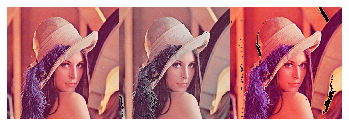

In [9]:
img_hls_changeRGB = cv2.cvtColor(img_hls_change, cv2.COLOR_BGR2RGB)
plt.imshow(img_hls_changeRGB)
plt.axis('off')
plt.show()

## Histogram Equalization

by using `cv2.equalizeHist()` to equalize the gray scale image

In [10]:
# 轉為灰階圖片
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 灰階圖片直方圖均衡
img_gray_equal = cv2.equalizeHist(img_gray)

# 組合圖片 + 顯示圖片
img_gray_equalHist = np.hstack((img_gray, img_gray_equal))
while True:
    # 比較灰階圖片是否有做直方圖均衡的差異
    cv2.imshow('gray equal histogram', img_gray_equalHist)

    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

> if we are going to plot gray scale image with `matplotlib`, set `cmap` to `plt.cm.gray` or `gray`

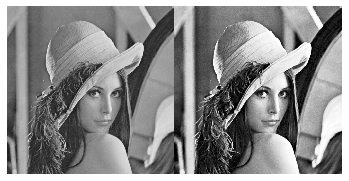

In [11]:
plt.imshow(img_gray_equalHist, cmap='gray')
plt.axis('off')
plt.show()

## modifiy contrast & brightness

In [12]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=3.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=100)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
while True:
    # 比較不同程度的對比 / 明亮
    cv2.imshow('adjust contrast and brighness', img_contrast_light)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

# HW

## Modifiy Saturation

- convert to `HSV` format

In [35]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [36]:
img_hsv_up = img_hsv.astype('float32')
img_hsv_up[..., 1] = img_hsv_up[..., 1] / 255 + change_percentage
img_hsv_up[img_hsv_up[..., 1] > 1] = 1
img_hsv_up[..., 1] = img_hsv_up[..., 1] * 255
img_hsv_up = img_hsv_up.astype('uint8')

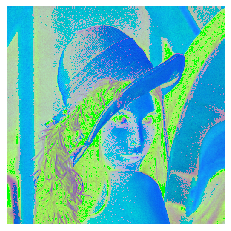

In [37]:
img_hsv_upRGB = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2RGB)
plt.imshow(img_hsv_up)
plt.axis('off')
plt.show()

In [38]:
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2BGR)
while True:
    # 比較不同程度的對比 / 明亮
    cv2.imshow('adjust contrast and brighness', img_hsv_up)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

## Equalize by Channel  

- by splitting channels
- by converting to HSV

In [48]:
img_channel_split = [img[..., 0], img[..., 1], img[..., 2]]

In [78]:
img_equal_bychannel = img.copy()
for i in range(3):
    img_equal_bychannel[..., i] = cv2.equalizeHist(img[..., i])

img_equal_byhsv = img_hsv.copy()
for i in range(3):
    img_equal_byhsv[..., i] = cv2.equalizeHist(img_hsv[..., i])
img_equal_byhsv = cv2.cvtColor(img_equal_byhsv, cv2.COLOR_HSV2BGR)

In [79]:
while True:
    # 比較不同程度的對比 / 明亮
    cv2.imshow('origin', img)
    cv2.imshow('equalize by channel', img_equal_bychannel)
    cv2.imshow('equalize by hsv', img_equal_byhsv)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break